<a href="https://colab.research.google.com/github/abrarzayedgithub/image-processing-test-/blob/main/problem_no_2(task1%2Ctask2%2Ctask3%2Ctask4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 3: Detect edges to analyze facial structures and expressions.


In [ ]:
import numpy as np
import  cv2
import matplotlib.pyplot as plt


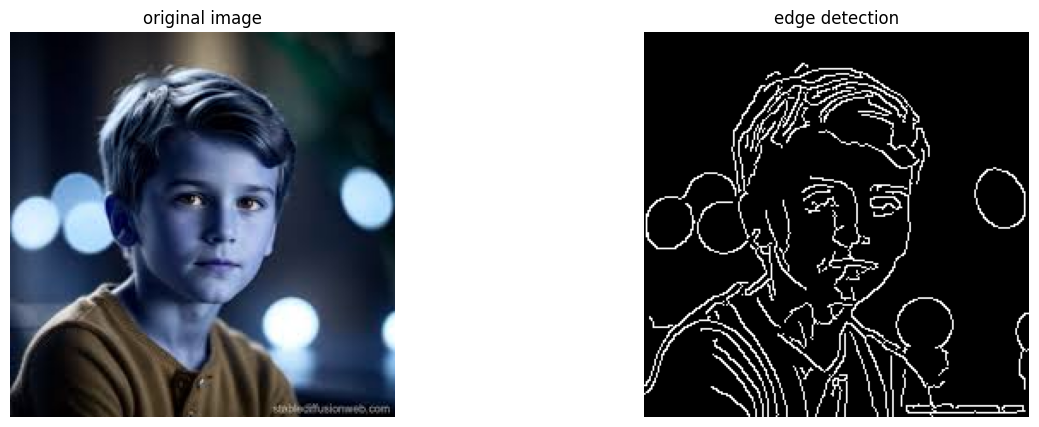

In [ ]:
#load the image
image = cv2.imread('/content/drive/MyDrive/a boy.jpeg')
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

#blur the image
blurred_image = cv2.GaussianBlur(gray_image,(5,5),0)
#detect edge by canny edge detection
edge = cv2.Canny(blurred_image,50,150)

#display the image
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(image,cmap='gray')
plt.title('original image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(edge,cmap='gray')
plt.title('edge detection')
plt.axis('off')

plt.show()

Task 4: Use image blurring to soften non-essential features while keeping the focus on facial expressions.

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

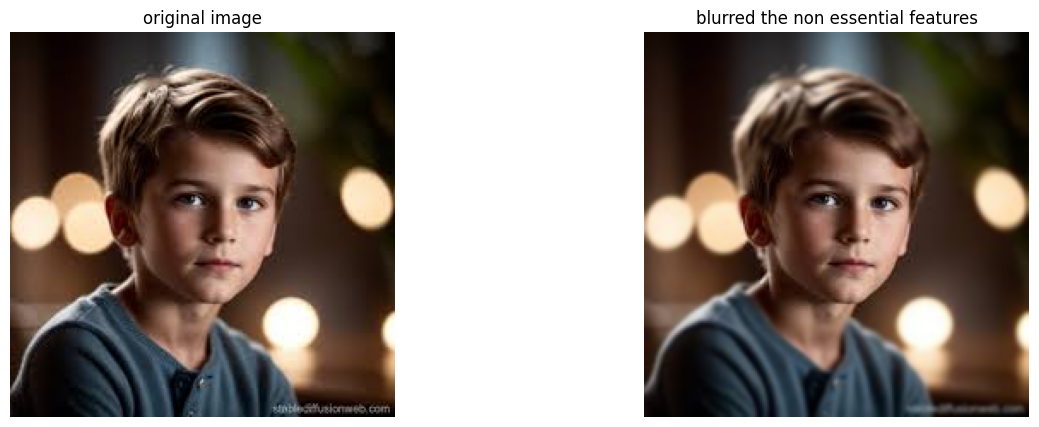

In [15]:
image = cv2.imread('/content/drive/MyDrive/a boy.jpeg')
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

#apply gaussian blur
blurred_image = cv2.GaussianBlur(image,(5,5),0)
#edge detection
edge = cv2.Canny(blurred_image,50,100)

#get the dimension of the image
height,width,_ = image.shape
mask = np.zeros((height,width),dtype='uint8')

#define the size and position of the square
radius = 800
center = width//2,height//2
radius = min(height,width)//4
cv2.circle(mask,center,radius,255,-1)


#inverse mask
inverse_mask = cv2.bitwise_not(mask)


#apply gaussian blur
blurred_image = cv2.GaussianBlur(image,(5,5),0)




#keep the original image within the mask
sharp_region = cv2.bitwise_and(image,image,mask=mask)

#mask in non essential area
blurred_region = cv2.bitwise_and(blurred_image,blurred_image,mask=inverse_mask)

#combine the sharp and blurred region
final_image = cv2.add(sharp_region,blurred_region)
#display the image
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.title('original image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(final_image,cv2.COLOR_BGR2RGB))
plt.title('blurred the non essential features')
plt.axis('off')

plt.show()

Task 2:Segment facial features to isolate eyes, mouth, and other key components.

In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


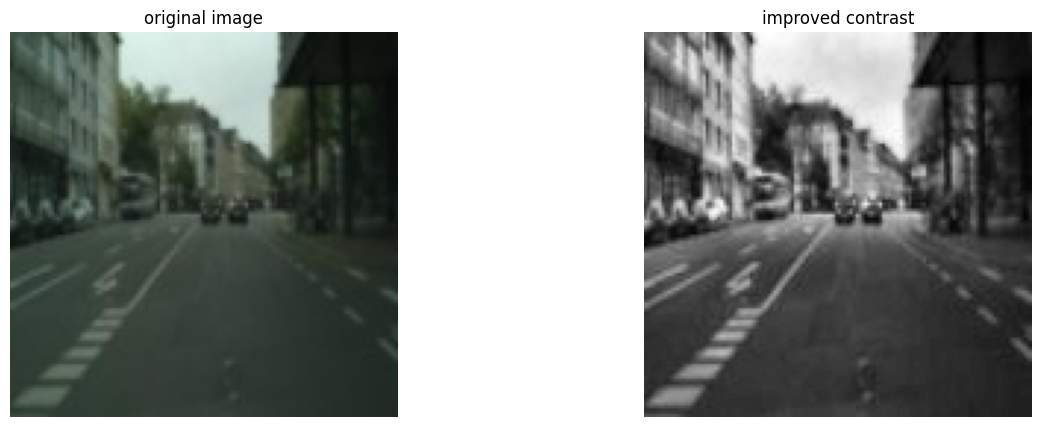

In [18]:
image = cv2.imread('/content/drive/MyDrive/traffic.jpg')
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

image_float = image.astype(np.float32)

#ajust brightness and contrust
alpha = 1.5
beta = 50
adjusted_image = alpha*image_float + beta
adjusted_image = np.clip(adjusted_image,0,255).astype(np.uint8)

#imporving contryst by using histogram equalization
clahe = cv2.createCLAHE(clipLimit=2,tileGridSize=(8,8))
clahe_image = clahe.apply(gray_image)

#display the image
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.title('original image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(clahe_image,cmap='gray')
plt.title('improved contrast')
plt.axis('off')

plt.show()